In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
X = pd.read_csv('train.csv')
print(X.shape)

(42000, 785)


In [3]:
X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(X[['label']].shape)

(42000, 1)


In [6]:
X.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000,42000,42000,42000
mean,4.456643,0,0,0,0,0,0,0,0,0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0,0,0,0
std,2.887730,0,0,0,0,0,0,0,0,0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0,0,0,0
min,0.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
25%,2.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
50%,4.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
75%,7.000000,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0
max,9.000000,0,0,0,0,0,0,0,0,0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0,0,0,0


In [7]:
Y = X[['label']]

In [8]:
Y.describe()

,label
count,42000.000000
mean,4.456643
std,2.887730
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [9]:
X = X.drop(["label"], axis=1)

In [10]:
print(X.shape)

(42000, 784)


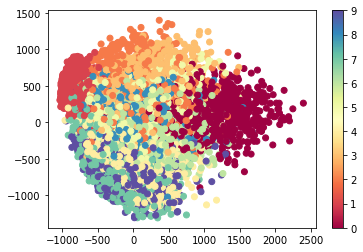

In [11]:
pca = PCA(2)
projected = pca.fit_transform(X.head(10000))
plt.scatter(projected[:,0], projected[:,1], c=Y.head(10000).values.ravel(), cmap=plt.cm.Spectral)
plt.colorbar()

In [12]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=.0001, loss='log', penalty='l2')
clf.fit(X, Y.values.ravel())

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
X_test = pd.read_csv('test.csv')
print(X_test.shape)

(28000, 784)


In [14]:
X_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import numpy as np
Y_test = np.array([])
for i in range(X_test.shape[0]/1000):
    Y_test = np.append(Y_test, clf.predict(X_test[i*1000: (i+1)*1000]))

In [16]:
frame = pd.DataFrame({'Label': Y_test})
frame.insert(0, 'ImageId', range(1, 1 + len(frame)))
frame.to_csv('output.csv', index=False)